<a href="https://colab.research.google.com/github/abdallah155/Customer-Personality-Analysis/blob/main/Customer_Personality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdallahtoba","key":"cd9ddfc550df0ebb9b7f824397a92d54"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!kaggle datasets download -d imakash3011/customer-personality-analysis


  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 68.1MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('customer-personality-analysis.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/marketing_campaign.csv',sep='\t')

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df['age'] = 2024 - df['Year_Birth']

In [ ]:
df.drop('Year_Birth',inplace=True,axis=1)
df

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
0,5524,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,3,11,1,67
1,2174,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,3,11,0,70
2,4141,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,3,11,0,59
3,6182,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,3,11,0,40
4,5324,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,3,11,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,0,0,0,0,0,0,3,11,0,57
2236,4001,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,0,0,0,1,0,0,3,11,0,78
2237,7270,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,0,1,0,0,0,0,3,11,0,43
2238,8235,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,0,0,0,0,0,0,3,11,0,68


# univariate analysis

In [ ]:
df.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

<Axes: >

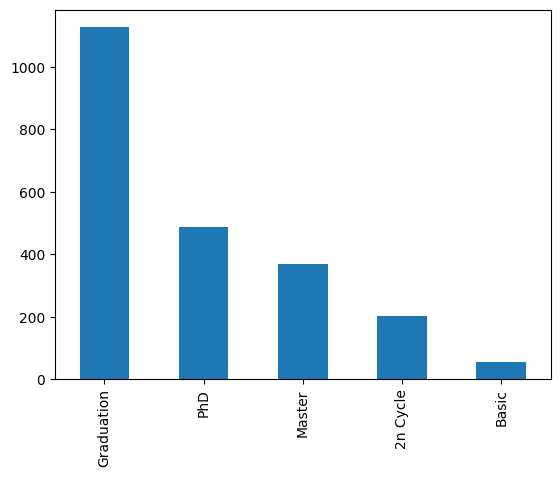

In [ ]:
df.Education.value_counts().plot(kind='bar')

*   most of the customers are graduates

<Axes: >

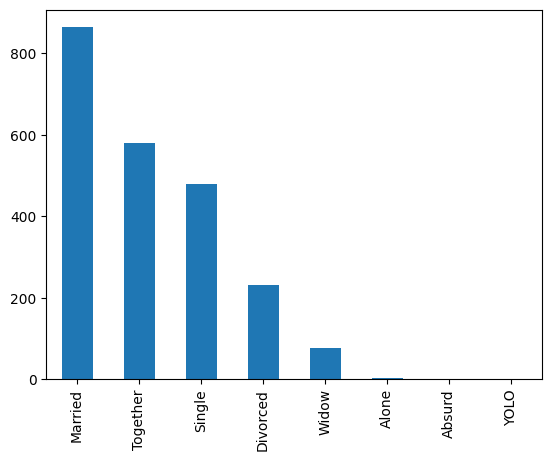

In [ ]:
df.Marital_Status.value_counts().plot(kind='bar')

most of the customers are married

In [ ]:
df.describe()[["Income"]].T[["mean","std"]]

,mean,std
Income,52247.251354,25173.076661


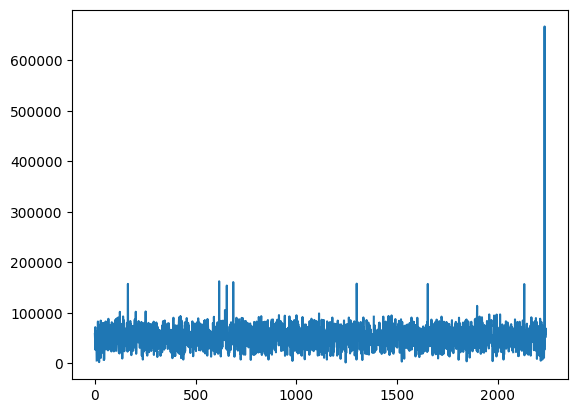

In [ ]:
plt.plot(df.Income)

In [ ]:
df.Income.min()

1730.0

*   customers mean income 52000k
*   min is 1700k
*   max is 666000k

<Axes: ylabel='Kidhome'>

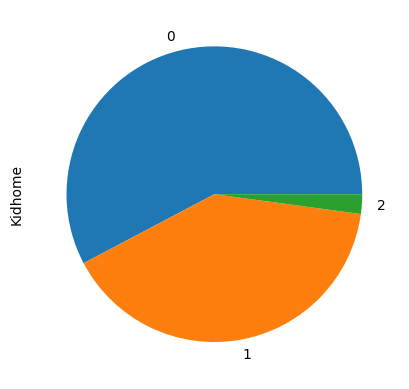

In [ ]:
df.Kidhome.value_counts().plot(kind='pie')

In [ ]:
df.Teenhome.value_counts()


0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

In [ ]:
df.Dt_Customer  = pd.to_datetime(df.Dt_Customer, format = "%d-%m-%Y")
df['join_year']=df.Dt_Customer.dt.year

In [ ]:
df["number_joined_years"] = 2024- df["join_year"]


In [ ]:
amounts = df.columns.to_list()[9:15]

In [ ]:
df.describe()[amounts]

,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000
std,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000
50%,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000
75%,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000
max,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000


In [ ]:
df[amounts].sum()

MntFruits             58917
MntMeatProducts      373968
MntFishProducts       84057
MntSweetProducts      60621
MntGoldProds          98609
NumDealsPurchases      5208
dtype: int64

In [ ]:
df['total_mnt'] = df['MntWines'] + df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts'] +df['MntSweetProducts'] + df['MntGoldProds']
df['total_Purchases'] = df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']
df['total_kids'] = df['Kidhome'] + df['Teenhome']


In [ ]:
campaigns = df.columns.tolist()[19:25]
df[campaigns].sum()

AcceptedCmp3    163
AcceptedCmp4    167
AcceptedCmp5    163
AcceptedCmp1    144
AcceptedCmp2     30
Complain         21
dtype: int64

In [ ]:
df.columns.tolist()[14:19]


['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

<Axes: >

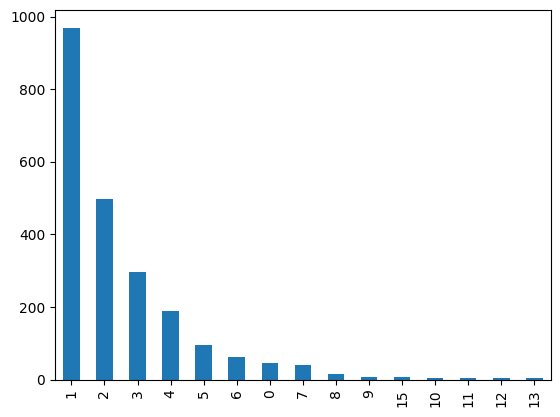

In [ ]:
df.NumDealsPurchases.value_counts().plot(kind='bar')

In [ ]:
visits = df.columns.tolist()[15:18]
df[visits]

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,8,10,4
1,1,1,2
2,8,2,10
3,2,0,4
4,5,3,6
...,...,...,...
2235,9,3,4
2236,8,2,5
2237,2,3,13
2238,6,5,10


<Axes: >

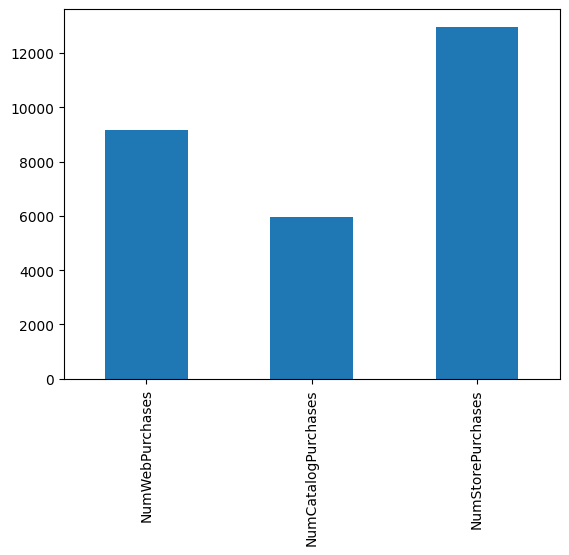

In [ ]:
df[visits].sum().plot(kind='bar')
# the store are most purchases

In [ ]:
df

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Complain,Z_CostContact,Z_Revenue,Response,age,join_year,number_joined_years,total_mnt,total_Purchases,total_kids
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,3,11,1,67,2012,12,1617,22,0
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,3,11,0,70,2014,10,27,4,2
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,3,11,0,59,2013,11,776,20,0
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,3,11,0,40,2014,10,53,6,1
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,3,11,0,43,2014,10,422,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,0,3,11,0,57,2013,11,1341,16,1
2236,4001,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,0,3,11,0,78,2014,10,444,15,3
2237,7270,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,0,3,11,0,43,2014,10,1241,18,0
2238,8235,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,0,3,11,0,68,2014,10,843,21,1


In [ ]:
df[visits][df.Teenhome == 0].sum()


NumWebPurchases        4240
NumCatalogPurchases    3464
NumStorePurchases      6528
dtype: int64

In [ ]:
df[visits][df.Teenhome == 1].sum()


NumWebPurchases        4661
NumCatalogPurchases    2374
NumStorePurchases      6117
dtype: int64

In [ ]:
df[visits][df.Teenhome == 2].sum()


NumWebPurchases        249
NumCatalogPurchases    125
NumStorePurchases      325
dtype: int64

In [ ]:
df.groupby("Education")["Income"].mean()


Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64

In [ ]:
df.groupby('Marital_Status')["Income"].mean()

Marital_Status
Absurd      72365.500000
Alone       43789.000000
Divorced    52834.228448
Married     51724.978996
Single      50995.350318
Together    53245.534031
Widow       56481.552632
YOLO        48432.000000
Name: Income, dtype: float64

<Axes: xlabel='Marital_Status'>

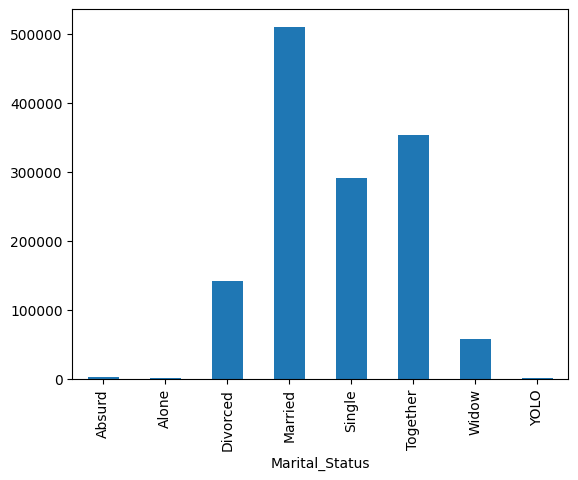

In [ ]:
df.groupby("Marital_Status")["total_mnt"].sum().plot(kind='bar')


<Axes: xlabel='Marital_Status'>

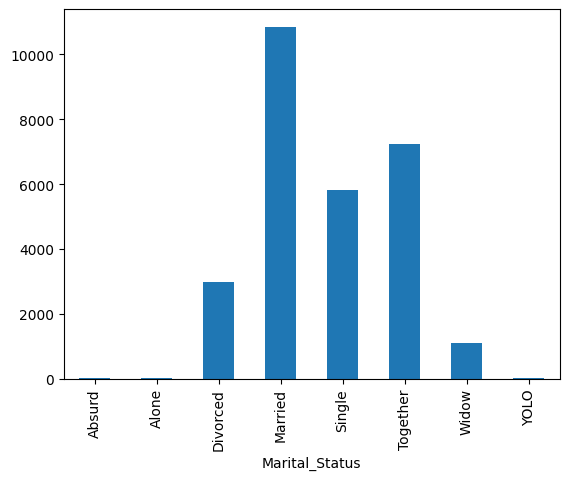

In [ ]:
df.groupby("Marital_Status")["total_Purchases"].sum().plot(kind='bar')
# married people buy alot

In [ ]:
df.isna().sum()


ID                      0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
age                     0
join_year               0
number_joined_years     0
total_mnt               0
total_Purchases         0
total_kids              0
dtype: int64

In [ ]:
df['Income'].fillna(df['Income'].mean(), inplace=True)


In [ ]:
df = df.drop(df[df.Income > 400000].index)


In [ ]:
df = df.drop(df[df.Income > 400000].index)

162397.0

<ipython-input-75-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

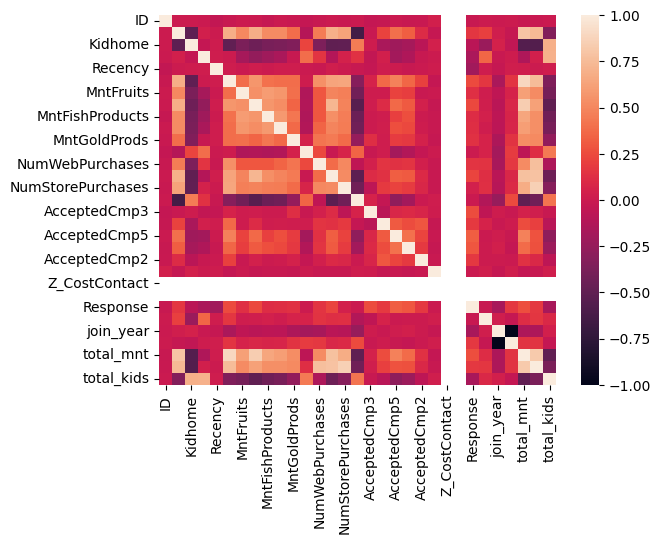

In [ ]:
sns.heatmap(df.corr())